In [ ]:
# Lab3: Web scraping

Doing web scraping in Python is a very common task. In this lab, we will learn how to do web scraping using the `requests`, `BeautifulSoup4` and `pyppeteer` libraries to scrape data from different websites developed in different technologies. In this lab, we will scrape data from the following websites:

- [Watsons HK](https://www.watsons.com.hk/?lang=en_HK) Watsons HK is a popular drugstore in Hong Kong, their online store contains a lot of information about their products. We will scrape the product information from their website.
- [Fortress HK](https://www.fortress.com.hk/en) Fortress HK is a poplar consumer electronic products store in Hong Kong, their online store contains a lot of information about their products. We will scrape the product information from their website.

In [ ]:
Lets start with installing all dependencies.

In [1]:
import sys
!{sys.executable} -m pip install requests BeautifulSoup4 pyppeteer nest_asyncio pandas numpy seaborn

  Using cached pyee-8.2.2-py2.py3-none-any.whl (12 kB)
  Using cached websockets-10.4-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (106 kB)
  Attempting uninstall: pyee
    Found existing installation: pyee 7.0.4
    Uninstalling pyee-7.0.4:
      Successfully uninstalled pyee-7.0.4
  Attempting uninstall: websockets
    Found existing installation: websockets 8.1
    Uninstalling websockets-8.1:
      Successfully uninstalled websockets-8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyppeteer2 0.2.2 requires pyee<8.0.0,>=7.0.1, but you have pyee 8.2.2 which is incompatible.
pyppeteer2 0.2.2 requires websockets<9.0,>=8.1, but you have websockets 10.4 which is incompatible.


In [ ]:
# just in case you have no pip module installed, you may install it with this code block
# After that your may run the previous code block to install dependencies with pip
import sys
import requests
import shutil

def download_file(url):
    local_filename = url.split('/')[-1]
    with requests.get(url, stream=True) as r:
        with open(local_filename, 'wb') as f:
            shutil.copyfileobj(r.raw, f)
    return local_filename

download_file('https://bootstrap.pypa.io/get-pip.py')

!{sys.extension} get-pip.py

In [ ]:
# Crawling data in HTML pages using requests and BeautifulSoup4

Let's take a look to [Watsons HK](https://www.watsons.com.hk/?lang=en_HK) website. We can see that the website is developed using HTML and CSS. We can also see that the website contains a lot of information about their products. We will scrape the product information from their website. There is a trick to generate product information from this kind of website, by using their provided search engine. Let's try to search simple word or character like "a" in the search box. We can see that the website will return a lot of products. We can also see that the website will generate a URL for each search result. The URL will contain the product information. We can use this URL to scrape the product information.

Please try to search with some simple character like "a", "1" and "2", and click on the second page of search result. The search keyword and page number would appear in the URL, it is one of the most popular method to implement search and pagination in website. Then we could view the HTML source code of the generated URL to see the product information. We can see that the product information is stored in the HTML source code.

To see the HTML page source, you could right click on the page and select `View page source`.

![](https://qph.cf2.quoracdn.net/main-qimg-0e120c25c959295e64dbae8528ed71e7)

For Safari, you could select "Show page source" in the "Develop" menu. Before that, you may need to enable `show develop menu` in Safari Preferences.
![](https://webkit.org/wp-content/uploads/web-inspector_macOS_Safari_Preferences_Advanced_Light.png)

In [ ]:
## HTML Tags and attributes
Before writing code to scrape data from websites, we need to understand how HTML pages are structured. HTML is a markup language that is used to structure content on a web page. HTML pages are made up of elements, which are represented by tags. Each tag has a start and end tag, and the content between the start and end tags is the content of the element. For example, the following HTML code represents a paragraph element:

```html
<p>This is a paragraph</p>
```

Different elements have different tags. For example, the following HTML code represents a heading element:
```html
<h1>This is a heading</h1>
```

The following HTML code represents a list element:
```html
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
</ul>
```
Some elements need attributes to work. For example, the following HTML code represents an image element which require a `src` attribute to specify the image source URL:
```html
<img src="https://www.w3schools.com/images/w3schools_green.jpg" alt="W3Schools.com" width="104" height="142">
```
The most common attributes are `id` and `class`. The `id` attribute is used to uniquely identify an element. The `class` attribute is used to identify elements with the same class. For example, the following HTML code represents a paragraph element with the `id` attribute set to `my-paragraph` and the `class` attribute set to `my-class`:
```html
<p id="my-paragraph" class="my-class">This is a paragraph</p>
```o

## Selecting elements using CSS selectors

In order to select elements from HTML pages, we need to understand how to select elements using CSS selectors. CSS selectors are used to select elements from HTML pages. There are many different types of CSS selectors. In this lab, we will only use the following CSS selectors:

- `tag`: Selects all elements with the specified tag. For example, `p` selects all paragraph elements.
- `#id`: Selects the element with the specified id. For example, `#my-paragraph` selects the element with the `id` attribute set to `my-paragraph`.
- `.class`: Selects all elements with the specified class. For example, `.my-class` selects all elements with the `class` attribute set to `my-class`.

In [ ]:


Lets try to scrape data from [Watsons HK](https://www.watsons.com.hk/en). We will first try to scrape the product information from the search page of the website. We will use the `requests` library to get the HTML content of the website, and use the `BeautifulSoup4` library to parse the HTML content. In order to behave like a real browser, we also set the `User-Agent` header to a common browser user agent. You may check the [list of latest user agents](https://useragents.me) for more information. Without this setting the server of Watsons HK would not allow us to visit their website. `Accept-Language` is also set to `en-US,en;q=0.9` to indicate that we prefer English content. However, server of Watsons HK would still return Chinese content becuase of their server does not respect the `Accept-Language` header.

In [2]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.watsons.com.hk/search?text=3&useDefaultSearch=false&currentPage=1'
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9'
}

soup = BeautifulSoup(requests.get(url, headers=headers).content, "html.parser")

key = soup.select_one(".productName").text
key

' 屈臣氏  屈臣氏奧米加-3深海魚油1000毫克200粒 '

In [ ]:
To get the first product name, we can use the `select_one` method of the `BeautifulSoup` object to select the first element with the `class` attribute set to `productName`. The `select_one` method will return a `Tag` object. We can use the `text` attribute of the `Tag` object to get the text content of the element.

To get all product name in the page, we can use the `select` method of the `BeautifulSoup` object to select all elements with the `class` attribute set to `productName`. The `select` method will return a list of `Tag` objects. We can use the `text` attribute of the `Tag` object to get the text content of the element.

In [5]:
soup.select(".productName")

[<h2 class="productName"><a class="ClickSearchResultEvent_Class gtmAlink" href="/%E5%B1%88%E8%87%A3%E6%B0%8F%E5%A5%A7%E7%B1%B3%E5%8A%A0-3%E6%B7%B1%E6%B5%B7%E9%AD%9A%E6%B2%B91000%E6%AF%AB%E5%85%8B200%E7%B2%92/p/BP_811000"> 屈臣氏  屈臣氏奧米加-3深海魚油1000毫克200粒 <!-- --><!-- --><!-- --></a></h2>,
 <h2 class="productName"><a class="ClickSearchResultEvent_Class gtmAlink" href="/3-in-1-micellar-water%E5%8D%B8%E5%A6%9D%E6%BD%94%E8%86%9A%E6%A3%89-20%E7%89%87/p/BP_803263"> 屈臣氏  3-IN-1 MICELLAR WATER卸妝潔膚棉 20片 <!-- --><!-- --><!-- --></a></h2>,
 <h2 class="productName"><a class="ClickSearchResultEvent_Class gtmAlink" href="/lemongrass-wet-wipes-10s-x-3-packs/p/BP_806061"> 屈臣氏  LEMONGRASS WET WIPES 10S X 3 Packs <!-- --><!-- --><!-- --></a></h2>,
 <h2 class="productName"><a class="ClickSearchResultEvent_Class gtmAlink" href="/%E8%96%B0%E8%A1%A3%E8%8D%89%E6%B8%85%E9%A6%99%E6%BD%94%E8%86%9A%E6%BF%95%E7%B4%99%E5%B7%BE10%E7%89%873%E5%8C%85%E8%A3%9D/p/BP_806060"> 屈臣氏  薰衣草清香潔膚濕紙巾10片3包裝 <!-- --><!-- --><!-- --></a

In [ ]:

To get all product name, we can use the `select` method of the `BeautifulSoup` object to select all elements with the `class` attribute set to `productName`. The result CSS selector string for the `select` method will be `.productName`. It will return a list of `Tag` objects. We can use the `text` attribute of the `Tag` object to get the text content of the element.

So that we could construct a list of product names in following way:

In [6]:
product_names = [product.text for product in soup.select(".productName")]
product_names

[' 屈臣氏  屈臣氏奧米加-3深海魚油1000毫克200粒 ',
 ' 屈臣氏  3-IN-1 MICELLAR WATER卸妝潔膚棉 20片 ',
 ' 屈臣氏  LEMONGRASS WET WIPES 10S X 3 Packs ',
 ' 屈臣氏  薰衣草清香潔膚濕紙巾10片3包裝 ',
 ' 屈臣氏  濕疹護理講座 (2023年2月25日 下午2時至3時半 - 現場) ',
 ' 屈臣氏  濕疹護理講座 (2023年2月25日 下午3時半至5時 - 現場) ',
 ' 屈臣氏  海洋清香迷你濕紙巾8片3包裝 ',
 ' 屈臣氏  森林友好竹纖維旅行包面紙 4包裝 (50張 x 3層) ',
 ' 屈臣氏  屈臣氏加厚型手口專用環境友善嬰兒柔濕巾 90S X 3 PKS ',
 ' 屈臣氏  WATSBAG軟包紙巾 (100張 X 3包) ',
 ' 屈臣氏  抗菌潔淨濕紙巾 (優惠裝) (50片 X 3包) ',
 ' 屈臣氏  WATSBAG軟包紙巾(原箱) (100張 X 3包) ',
 ' 屈臣氏  屈臣氏輕薄潤滑衛生套3片 ',
 ' 屈臣氏  濕疹護理講座 (2023年2月25日 下午2時至3時半 - 網上) [預售 - 2023年2月20日開始發貨] ',
 ' 屈臣氏  濕疹護理講座 (2023年2月25日 下午3時半至5時 - 網上) [預售 - 2023年2月20日開始發貨] ',
 ' 屈臣氏  圓形粉撲3片裝 ',
 ' 屈臣氏  防曬三摺雨傘(顏色隨機) ',
 ' 屈臣氏  WISMAL三摺晴雨傘(顏色隨機) ',
 ' 屈臣氏  可更換刷頭3S ',
 ' 屈臣氏  牙線棒50支3盒裝 ',
 ' 屈臣氏  WATSBAG軟包紙巾3包100張 (3層) 2包裝 ',
 ' 屈臣氏  竹炭牙線棒50支3盒裝 ',
 ' 屈臣氏  薄荷牙線捧50支3盒裝 ',
 ' 屈臣氏  維他命B雜水溶片 15片 X 3筒裝 ',
 ' 屈臣氏  抗菌潔淨濕紙巾10片3包裝 ',
 ' 屈臣氏  竹纖維迷你袋裝紙手帕10包 3層X10張(FSC 認證) ',
 ' 屈臣氏  春日花香迷你柔濕巾8片3包裝 ',
 ' 屈臣氏  WATSMASK ASTM 3三色醫用口罩30片裝 –  啡色系 (成人適用) ',
 ' 屈臣氏  ASTM Lev

In [ ]:

Rather than only getting the product name, it would be more meaningful to get all the product price, product image URL and product URL as a list of dict. In this way, we could easily convert the list of dict to a pandas DataFrame. To get the product information, we will need to find out the CSS selector for a single product. By looking at the HTML source code of the search result page, we can see that the product information is stored in a `div` element with the `class` attribute includes `productContainer` class name. The following HTML code represents a single product element:

```html
<div class="productContainer">
    <div class="brandicon ..."><!-- ... --></div>
    <div class="productImage"><!-- ... --></div>
    <div class="productInfo">
        <div class="productHighlight"><!-- ... --></div>
        <h2 class="productName"><!-- ... --></h2>
        <div class="colorNumber"><!-- ... --></div>
        <div class="productPrice"><!-- ... --></div>
        <div class="productBottom"><!-- ... --></div>
    </div>
</div>
```

After understanding the structure of the HTML code, we can use the following CSS selector in Python with a loop to select all product elements:

In [24]:
products = [{
    'name':product.select_one('.productName').text,
    'price':product.select_one('.productPrice').text,
    'orig_price':product.select_one('.productOriginalPrice').text if not product.select_one('.productOriginalPrice') == None else '',
    'member_price':product.select_one('.memberPrice').text if not product.select_one('.memberPrice') == None else '',
    'review_count':product.select_one('.reviewCount').text,
    'rating':len(product.select('.icon-star01')),
} for product in soup.select(".productInfo")]
products

[{'name': ' 屈臣氏  屈臣氏奧米加-3深海魚油1000毫克200粒 ',
  'price': ' HK$159.00  HK$119.00 ',
  'orig_price': '',
  'member_price': ' HK$119.00 ',
  'review_count': ' (1) ',
  'rating': 5},
 {'name': ' 屈臣氏  3-IN-1 MICELLAR WATER卸妝潔膚棉 20片 ',
  'price': ' HK$29.00 ',
  'orig_price': '',
  'member_price': '',
  'review_count': ' (2) ',
  'rating': 5},
 {'name': ' 屈臣氏  LEMONGRASS WET WIPES 10S X 3 Packs ',
  'price': ' HK$11.90 ',
  'orig_price': '',
  'member_price': '',
  'review_count': ' (7) ',
  'rating': 5},
 {'name': ' 屈臣氏  薰衣草清香潔膚濕紙巾10片3包裝 ',
  'price': ' HK$11.90 ',
  'orig_price': '',
  'member_price': '',
  'review_count': ' (3) ',
  'rating': 5},
 {'name': ' 屈臣氏  濕疹護理講座 (2023年2月25日 下午2時至3時半 - 現場) ',
  'price': ' HK$50.00 ',
  'orig_price': '',
  'member_price': '',
  'review_count': ' (0) ',
  'rating': 0},
 {'name': ' 屈臣氏  濕疹護理講座 (2023年2月25日 下午3時半至5時 - 現場) ',
  'price': ' HK$50.00 ',
  'orig_price': '',
  'member_price': '',
  'review_count': ' (0) ',
  'rating': 0},
 {'name': ' 屈臣氏  海洋清香迷你

In [ ]:
# After grabbing the data, we can convert the list of dict to a pandas DataFrame

In [45]:
import pandas as pd

df = pd.DataFrame(products)
df.head(20)

,name,price,orig_price,member_price,review_count,rating
0,屈臣氏 屈臣氏奧米加-3深海魚油1000毫克200粒,HK$159.00 HK$119.00,,HK$119.00,(1),5
1,屈臣氏 3-IN-1 MICELLAR WATER卸妝潔膚棉 20片,HK$29.00,,,(2),5
2,屈臣氏 LEMONGRASS WET WIPES 10S X 3 Packs,HK$11.90,,,(7),5
3,屈臣氏 薰衣草清香潔膚濕紙巾10片3包裝,HK$11.90,,,(3),5
4,屈臣氏 濕疹護理講座 (2023年2月25日 下午2時至3時半 - 現場),HK$50.00,,,(0),0
5,屈臣氏 濕疹護理講座 (2023年2月25日 下午3時半至5時 - 現場),HK$50.00,,,(0),0
6,屈臣氏 海洋清香迷你濕紙巾8片3包裝,HK$10.90,,,(4),5
7,屈臣氏 森林友好竹纖維旅行包面紙 4包裝 (50張 x 3層),HK$10.90 HK$9.00,,HK$9.00,(30),5
8,屈臣氏 屈臣氏加厚型手口專用環境友善嬰兒柔濕巾 90S X 3 PKS,HK$52.90,,,(2),5
9,屈臣氏 WATSBAG軟包紙巾 (100張 X 3包),HK$15.90 HK$13.00,,HK$13.00,(124),5


In [ ]:
## Data cleaning

After retrieving the data, we need to clean the data. In this case, we need to cleanup orignal price and member price from price, remove the currency symbol and then convert the price to float. We can use the `replace` method of the `str` object to remove the currency symbol. We can use the `astype` method of the `Series` object to convert the data type of the column to `float`.

In [46]:
# split price with df.apply and lambda
df['price'] = df.apply(lambda x: x['price'].replace(x['orig_price'], '').replace(x['member_price'], ''), axis=1)
df.head(25)

,name,price,orig_price,member_price,review_count,rating
0,屈臣氏 屈臣氏奧米加-3深海魚油1000毫克200粒,HK$159.00,,HK$119.00,(1),5
1,屈臣氏 3-IN-1 MICELLAR WATER卸妝潔膚棉 20片,HK$29.00,,,(2),5
2,屈臣氏 LEMONGRASS WET WIPES 10S X 3 Packs,HK$11.90,,,(7),5
3,屈臣氏 薰衣草清香潔膚濕紙巾10片3包裝,HK$11.90,,,(3),5
4,屈臣氏 濕疹護理講座 (2023年2月25日 下午2時至3時半 - 現場),HK$50.00,,,(0),0
5,屈臣氏 濕疹護理講座 (2023年2月25日 下午3時半至5時 - 現場),HK$50.00,,,(0),0
6,屈臣氏 海洋清香迷你濕紙巾8片3包裝,HK$10.90,,,(4),5
7,屈臣氏 森林友好竹纖維旅行包面紙 4包裝 (50張 x 3層),HK$10.90,,HK$9.00,(30),5
8,屈臣氏 屈臣氏加厚型手口專用環境友善嬰兒柔濕巾 90S X 3 PKS,HK$52.90,,,(2),5
9,屈臣氏 WATSBAG軟包紙巾 (100張 X 3包),HK$15.90,,HK$13.00,(124),5


In [47]:
# clean up spaces, RRP and HK$ in price, orig_price and member_price and then convert to numeric
df['orig_price'] = pd.to_numeric(df['orig_price'].str.replace('RRP', '').str.replace('HK\$', '').str.strip())
df['price'] = pd.to_numeric(df['price'].str.replace('HK\$', '').str.strip())
df['member_price'] = pd.to_numeric(df['member_price'].str.replace('HK\$', '').str.strip())
df.head(25)

/tmp/ipykernel_23694/2382327825.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['orig_price'] = pd.to_numeric(df['orig_price'].str.replace('RRP', '').str.replace('HK\$', '').str.strip())
/tmp/ipykernel_23694/2382327825.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price'] = pd.to_numeric(df['price'].str.replace('HK\$', '').str.strip())
/tmp/ipykernel_23694/2382327825.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['member_price'] = pd.to_numeric(df['member_price'].str.replace('HK\$', '').str.strip())


,name,price,orig_price,member_price,review_count,rating
0,屈臣氏 屈臣氏奧米加-3深海魚油1000毫克200粒,159.0,NaN,119.0,(1),5
1,屈臣氏 3-IN-1 MICELLAR WATER卸妝潔膚棉 20片,29.0,NaN,NaN,(2),5
2,屈臣氏 LEMONGRASS WET WIPES 10S X 3 Packs,11.9,NaN,NaN,(7),5
3,屈臣氏 薰衣草清香潔膚濕紙巾10片3包裝,11.9,NaN,NaN,(3),5
4,屈臣氏 濕疹護理講座 (2023年2月25日 下午2時至3時半 - 現場),50.0,NaN,NaN,(0),0
5,屈臣氏 濕疹護理講座 (2023年2月25日 下午3時半至5時 - 現場),50.0,NaN,NaN,(0),0
6,屈臣氏 海洋清香迷你濕紙巾8片3包裝,10.9,NaN,NaN,(4),5
7,屈臣氏 森林友好竹纖維旅行包面紙 4包裝 (50張 x 3層),10.9,NaN,9.0,(30),5
8,屈臣氏 屈臣氏加厚型手口專用環境友善嬰兒柔濕巾 90S X 3 PKS,52.9,NaN,NaN,(2),5
9,屈臣氏 WATSBAG軟包紙巾 (100張 X 3包),15.9,NaN,13.0,(124),5


In [48]:
# clean up brackets in review_count and then convert to numeric
df['review_count'] = pd.to_numeric(df['review_count'].str.replace('[()]', '').str.strip())
df['rating'] = pd.to_numeric(df['rating'])
df.head(25)

/tmp/ipykernel_23694/3658055652.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review_count'] = pd.to_numeric(df['review_count'].str.replace('[()]', '').str.strip())


,name,price,orig_price,member_price,review_count,rating
0,屈臣氏 屈臣氏奧米加-3深海魚油1000毫克200粒,159.0,NaN,119.0,1,5
1,屈臣氏 3-IN-1 MICELLAR WATER卸妝潔膚棉 20片,29.0,NaN,NaN,2,5
2,屈臣氏 LEMONGRASS WET WIPES 10S X 3 Packs,11.9,NaN,NaN,7,5
3,屈臣氏 薰衣草清香潔膚濕紙巾10片3包裝,11.9,NaN,NaN,3,5
4,屈臣氏 濕疹護理講座 (2023年2月25日 下午2時至3時半 - 現場),50.0,NaN,NaN,0,0
5,屈臣氏 濕疹護理講座 (2023年2月25日 下午3時半至5時 - 現場),50.0,NaN,NaN,0,0
6,屈臣氏 海洋清香迷你濕紙巾8片3包裝,10.9,NaN,NaN,4,5
7,屈臣氏 森林友好竹纖維旅行包面紙 4包裝 (50張 x 3層),10.9,NaN,9.0,30,5
8,屈臣氏 屈臣氏加厚型手口專用環境友善嬰兒柔濕巾 90S X 3 PKS,52.9,NaN,NaN,2,5
9,屈臣氏 WATSBAG軟包紙巾 (100張 X 3包),15.9,NaN,13.0,124,5


In [ ]:
# Crawling data from webpages with dynamic HTML using pyppeteer

In the previous section, we have learned how to scrape data from static HTML pages. However, most of the websites nowadays use Javascript to generated dynamic HTML in browser which would make `BeautifulSoup4` unable to work. In this section, we will learn how to scrape data from dynamic HTML pages using the `pyppeteer` library. `pyppeteer` is a Python library for controlling headless Chrome or Chromium over the DevTools Protocol. It is a port of the Node.js library [puppeteer](https://pptr.dev/).

In order to run `pyppeteer` directly in Jupyter notebook, `nest_asyncio` is required. `nest_asyncio` allows you to run `asyncio` code in Jupyter notebook.

In [59]:
import asyncio
from websockets import client
from pyppeteer import launch

import nest_asyncio
nest_asyncio.apply()

async def main():
    #browser = await launch({'executablePath': '/usr/bin/google-chrome-beta', 'headless': False})
    browser = await launch({'headless': False, 'args': ['--no-sandbox']})
    page = await browser.newPage()
    await page.setViewport({'width': 1920, 'height': 1080})
    await page.goto('https://www.fortress.com.hk/en')
    await page.screenshot({'path': 'example.png', 'fullPage': True})
    await browser.close()

asyncio.get_event_loop().run_until_complete(main())

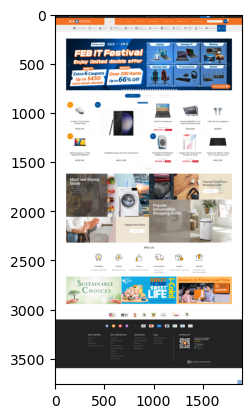

In [60]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('example.png')
plt.imshow(img)

In [ ]:

We may futher wrap the code into a function to make it reusable.

In [61]:

def runAndReturn(func):
      return asyncio.get_event_loop().run_until_complete(asyncio.gather(func))[0]

runAndReturn(main())

In [ ]:
Lets try to apply the same method to scrape the data from the search result page of Fortress HK. For example, please search for "a" in the search box of the website and then click the search button. The search result page will be displayed. We can see that the search result page is generated by Javascript. To more results, we will need to click on `View more` button at the bottom. Therefore, we cannot use BeautifulSoup4 to scrape the data from the search result page.

In [ ]:

Before touching on the implementation, we need to understand some basic JavaScript concepts. JavaScript is a programming language that is used to make web pages interactive. It is a scripting language that is executed on the client side. It is used to add interactivity and render dynamic content in web pages.

During web scraping, we will touch on the following concepts in Client-side JavaScript:
- [DOM](https://developer.mozilla.org/en-US/docs/Web/API/Document_Object_Model/Introduction) (Document Object Model)
- [Node](https://developer.mozilla.org/en-US/docs/Web/API/Node)
- [Array](https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Global_Objects/Array)

In [ ]:
async def searchFortressHK(keyword):
  data = []
  browser = await launch({'headless': False, 'args':['--no-sandbox']})
  page = await browser.newPage() # open a new browser window
  await page.setUserAgent('Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36')
  await page.setViewport({'width':1280, 'height':1024})
  await page.goto(f'https://www.fortress.com.hk/en/search?q={keyword}', {'waitUntil':'networkidle0'}) # goto the urldow
  viewMore = await page.J('.btn-ajax-add-products')
  if viewMore == None:
    return data
  while True:
    viewMoreWithStyleAttr = await page.J('.btn-ajax-add-products[style]')
    if not viewMoreWithStyleAttr == None:
      break
    await viewMore.click()
    await page.waitForNavigation({'waitUntil':'networkidle0'})

  data = [{
    'title': await p.Jeval('.thumb', 'node => node.getAttribute("title")'),
    'name': await p.Jeval('.thumb', 'node => node.getAttribute("data-gtm-product-impressions-name")'),
    'brand': await p.Jeval('.thumb', 'node => node.getAttribute("data-gtm-product-impressions-brand")'),
    'category': await p.Jeval('.thumb', 'node => node.getAttribute("data-gtm-product-impressions-category")'),
    'price': await p.Jeval('.thumb', 'node => node.getAttribute("data-gtm-product-impressions-price")'),
    'variantname': await p.Jeval('.thumb', 'node => node.getAttribute("data-gtm-product-impressions-variantname")'),
    'imageurl': await p.Jeval('.thumb img', 'node => "https://www.fortress.com.hk" + node.getAttribute("src")')
  } for p in await page.JJ('.products .grid-item')]

  await browser.close() # close browser window
  return data

In [63]:
%time samsung = runAndReturn(searchFortressHK('samsung'))

CPU times: user 2.87 s, sys: 186 ms, total: 3.06 s
Wall time: 16.5 s


In [66]:
samsung_df = pd.DataFrame(samsung)
samsung_df.head(25)

,title,name,brand,category,price,variantname,imageurl
0,SAMSUNG ASAM20220404,asam20220404,samsung,mobile-and-communications/phone-cases-and-scre...,78.0,samsung-galaxy-a53-5,https://www.fortress.com.hk/medias/12655952-12...
1,SAMSUNG S Pen Pro,s-pen-pro,samsung,mobile-and-communications/mobile-phone-accesso...,798.0,12481593,https://www.fortress.com.hk/medias/12481593-12...
2,SAMSUNG The Freestyle Projector,the-freestyle-projector,samsung,tv-entertainment/projectors,6480.0,samsung-the-freest,https://www.fortress.com.hk/medias/12722158-12...
3,SAMSUNG Wireless car charger,wireless-car-charger,samsung,mobile-and-communications/chargers-and-adapter...,498.0,12593309,https://www.fortress.com.hk/medias/12593309-12...
4,SAMSUNG Galaxy Book2 Notebook,galaxy-book2-notebook,samsung,computing/laptops,7380.0,galaxy-book2-156,https://www.fortress.com.hk/medias/12664963-12...
5,SAMSUNG Sero TV Wheel,sero-tv-wheel,samsung,tv-entertainment/tv-entertainment-accessories,690.0,samsung-tv-accessory,https://www.fortress.com.hk/medias/Samsung-TV-...
6,SAMSUNG The Freestyle Battery Base,the-freestyle-battery-base,samsung,tv-entertainment/tv-entertainment-accessories,1043.0,the-freestyle-batter,https://www.fortress.com.hk/medias/12723513-12...
7,SAMSUNG EO-IA500BBEGWW Samsung 3.5mm wired ear...,eo-ia500bbegww-samsung-35mm-wired-earphones,samsung,tv-entertainment/earphones-and-headphones,118.0,samsung-35mm-wired-,https://www.fortress.com.hk/medias/12582520-12...
8,SAMSUNG BU8500 LED LCD TV,bu8500-led-lcd-tv,samsung,tv-entertainment/tvs,4180.0,samsung-43-uhd-tv,https://www.fortress.com.hk/medias/12690310-12...
9,SAMSUNG S95B OLED TV,s95b-oled-tv,samsung,tv-entertainment/tvs,17980.0,samsung-55-oled-s95,https://www.fortress.com.hk/medias/Samsung-55-...
